<a href="https://colab.research.google.com/github/LinconMatheus26/BigData-AnalisePE-/blob/main/BigData(graficoPe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Violência Doméstica no estado de Pernambuco e Propostas para Melhoria da Segurança.

Equipe:
Lincon Matheus
Erick Lins
Pricila Ribas
Heber Marinho
Wellington Lima
Pablo Riquelme
Pedro Valença

Com base nas análises realizadas, foi observado um aumento contínuo nas ocorrências de violência doméstica, especialmente na região metropolitana, ao longo dos anos. Esse cenário sugere a necessidade de políticas e leis mais eficazes para combater e reduzir esses atos.

Análises Realizadas:
Análise de Dados Gerais:

Foram analisados dados de violência doméstica entre os anos de 2015 a 2024.
Identificação de um aumento constante no número de ocorrências ao longo desses anos, especialmente na região metropolitana.
Análise Específica para Recife:

Foi realizado um estudo específico para Recife, onde se observou um aumento significativo nas ocorrências de violência doméstica no período analisado.
Essa análise destacou a necessidade de intervenções mais eficazes para proteger os indivíduos em ambiente doméstico.
Comparação e Tendências:

Foram comparadas as tendências de ocorrências em diferentes regiões e ao longo dos anos.
A constatação de um crescimento contínuo reforça a importância de medidas legislativas mais rigorosas e políticas de prevenção mais eficazes.
Recomendações:
Diante desses dados, recomenda-se:

Revisão e Reforço da Legislação: Proporcionar leis mais rigorosas e eficazes para lidar com casos de violência doméstica, garantindo proteção adequada às vítimas e punição aos agressores.

Investimento em Prevenção: Implementar programas de conscientização e prevenção nas comunidades, visando educar sobre os direitos e recursos disponíveis para vítimas de violência doméstica.

Apoio às Vítimas: Expandir os serviços de apoio psicológico, jurídico e social para as vítimas, facilitando o acesso a ajuda e suporte adequados.

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b692d978a0d3d2f75a97956c790212e00a1028a35106caff74093500342f062f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("violenciad") \
    .getOrCreate()

In [4]:
import gdown
import os
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/13FcWErE0mPMSBAGIy7A_WXgvmRE-IXm9/export?format=xlsx'
#output = 'drive/MyDrive/Colab_Notebooks/vilenciad.xlsx'
output = 'vilenciad.xlsx'


#os.makedirs(os.path.dirname(output), exist_ok=True)

gdown.download(url, output, quiet=False)


df = pd.read_excel('vilenciad.xlsx') #carrega o arquivo xlsx que foi baixado
df.to_csv('violencia.csv') # converte para csv

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/13FcWErE0mPMSBAGIy7A_WXgvmRE-IXm9/export?format=xlsx
To: /content/vilenciad.xlsx
9.91MB [00:00, 46.8MB/s]


In [31]:
# Lendo o arquivo CSV com PySpark
df = spark.read.csv('violencia.csv', header=True, inferSchema=True)

# Mostrando as primeiras linhas do DataFrame para verificação
df.show(5)

+---+--------------------+--------------------+--------------------+----------+----+--------+--------+----------+
|_c0|           MUNICÍPIO|              REGIAO|            NATUREZA|      DATA| ANO|    SEXO|  IDADE |ENVOLVIDOS|
+---+--------------------+--------------------+--------------------+----------+----+--------+--------+----------+
|  0|             AFRANIO|              SERTÃO|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
|  1|           ALAGOINHA|             AGRESTE|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|6) 35-64|         1|
|  2|            BEZERROS|             AGRESTE|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
|  3|CABO DE SANTO AGO...|REGIÃO METROPOLITANA|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|3) 18-24|         1|
|  4|CABO DE SANTO AGO...|REGIÃO METROPOLITANA|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
+---+--------------------+--------------------+--------------------+----------+----+----

In [32]:
from pyspark.sql import SparkSession


In [33]:
spark = SparkSession.builder.appName("Análise de Dados").getOrCreate()


In [34]:
df = spark.read.csv("violencia.csv", header=True, inferSchema=True)


In [35]:
df.printSchema()
df.show(5)


root
 |-- _c0: integer (nullable = true)
 |-- MUNICÍPIO: string (nullable = true)
 |-- REGIAO: string (nullable = true)
 |-- NATUREZA: string (nullable = true)
 |-- DATA: date (nullable = true)
 |-- ANO: integer (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- IDADE : string (nullable = true)
 |-- ENVOLVIDOS: integer (nullable = true)

+---+--------------------+--------------------+--------------------+----------+----+--------+--------+----------+
|_c0|           MUNICÍPIO|              REGIAO|            NATUREZA|      DATA| ANO|    SEXO|  IDADE |ENVOLVIDOS|
+---+--------------------+--------------------+--------------------+----------+----+--------+--------+----------+
|  0|             AFRANIO|              SERTÃO|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
|  1|           ALAGOINHA|             AGRESTE|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|6) 35-64|         1|
|  2|            BEZERROS|             AGRESTE|AMEAÇA POR VIOLÊN...|2015-01-01|201

In [36]:
from pyspark.sql.functions import col

# Contagem de ocorrências por região no estado de Pernambuco entre 2015-2024
contagem_por_regiao = df.groupBy('REGIAO').count().orderBy('count', ascending=False)
contagem_por_regiao.show()


+--------------------+-----+
|              REGIAO|count|
+--------------------+-----+
|REGIÃO METROPOLITANA|90437|
|             AGRESTE|78230|
|              SERTÃO|72895|
|              RECIFE|53231|
|        ZONA DA MATA|39651|
+--------------------+-----+



In [37]:
# Contagem de ocorrências por ano(Percebe-se que a vlionecia )
contagem_por_ano = df.groupBy('ANO').count().orderBy('ANO')
contagem_por_ano.show()



+----+-----+
| ANO|count|
+----+-----+
|2015|27498|
|2016|27872|
|2017|29121|
|2018|35138|
|2019|37152|
|2020|36403|
|2021|36985|
|2022|38883|
|2023|45815|
|2024|19577|
+----+-----+



In [38]:
# Verifique se o nome da coluna está correto e se existe no DataFrame
print(df.columns)  # Imprime as colunas do DataFrame



['_c0', 'MUNICÍPIO', 'REGIAO', 'NATUREZA', 'DATA', 'ANO', 'SEXO', 'IDADE ', 'ENVOLVIDOS']


In [39]:
from pyspark.sql.functions import col

# Renomear colunas para remover espaços extras
df = df.withColumnRenamed("IDADE ", "IDADE")  # Remova espaços no final de 'IDADE' se existirem

# Verifique novamente as colunas
df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- MUNICÍPIO: string (nullable = true)
 |-- REGIAO: string (nullable = true)
 |-- NATUREZA: string (nullable = true)
 |-- DATA: date (nullable = true)
 |-- ANO: integer (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- IDADE: string (nullable = true)
 |-- ENVOLVIDOS: integer (nullable = true)



In [46]:
#Contagem de ocorrências por tipo de crime (Nota-se que ameaças por violência doméstica e familiar são mais frequentes, possivelmente devido à legislação mais rigorosa para esses casos).
contagem_por_natureza = df.groupBy('NATUREZA').count().orderBy('count', ascending=False)
print("Contagem de ocorrências por natureza:")
contagem_por_natureza.show()


Contagem de ocorrências por natureza:
+--------------------+------+
|            NATUREZA| count|
+--------------------+------+
|AMEAÇA POR VIOLÊN...|121177|
|LESÃO CORPORAL PO...| 80926|
|INJÚRIA POR VIOLÊ...| 44874|
|DANO POR VIOLÊNCI...| 17316|
|OUTROS CRIMES POR...| 17258|
|VIAS DE FATOS POR...| 17117|
|PERTURBAÇÃO DO SO...| 10587|
|DIFAMAÇÃO POR VIO...|  8534|
|MAUS TRATOS POR V...|  4540|
|ESTUPRO DE VULNER...|  3805|
|PERSEGUIÇÃO POR V...|  3534|
|CALÚNIA POR VIOLÊ...|  1880|
|ESTUPRO POR VIOLÊ...|  1325|
|CONSTRANGIMENTO I...|  1219|
|CÁRCERE PRIVADO P...|   352|
+--------------------+------+



In [43]:
# Excluir registros onde a coluna 'IDADE' é nula
df = df.filter(df.IDADE.isNotNull())


In [44]:
from pyspark.sql.types import IntegerType

# Cast the 'IDADE' column to IntegerType
df = df.withColumn("IDADE", col("IDADE").cast(IntegerType()))


In [47]:
# Calcular a média de idade dos envolvidos por natureza
media_idade_por_natureza = df.groupBy('NATUREZA').avg('IDADE').orderBy('avg(IDADE)', ascending=False)
print("Média de idade dos envolvidos por natureza:")
media_idade_por_natureza.show(truncate=False)


Média de idade dos envolvidos por natureza:
+-------------------------------------------------------+----------+
|NATUREZA                                               |avg(IDADE)|
+-------------------------------------------------------+----------+
|INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR               |NULL      |
|DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             |NULL      |
|CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|NULL      |
|ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR               |NULL      |
|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                |NULL      |
|ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR |NULL      |
|CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR               |NULL      |
|DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  |NULL      |
|CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR       |NULL      |
|VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR         |NULL      |
|LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR        |NU

In [48]:
# Média de número de violencia domestica
media_envolvidos_por_natureza = df.groupBy('NATUREZA').avg('ENVOLVIDOS').orderBy('avg(ENVOLVIDOS)', ascending=False)
print("Média de envolvidos por natureza:")
media_envolvidos_por_natureza.show(truncate=False)


Média de envolvidos por natureza:
+-------------------------------------------------------+------------------+
|NATUREZA                                               |avg(ENVOLVIDOS)   |
+-------------------------------------------------------+------------------+
|INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR               |1.32377323171547  |
|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                |1.2995617980309795|
|LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR        |1.1363097150483157|
|MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR           |1.1246696035242292|
|VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR         |1.0994917333644914|
|PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|1.0908661566071598|
|ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR |1.0791064388961893|
|PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR           |1.0659309564233164|
|DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             |1.052261542067026 |
|OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAM

In [50]:
# Filtrar os dados para incluir apenas os anos de 2015 a 2024
df_filtered = df.filter((df.ANO >= 2015) & (df.ANO <= 2024))


In [51]:
# Contagem de ocorrências por ano e natureza
contagem_ano_por_natureza = df_filtered.groupBy('ANO', 'NATUREZA').count()


In [53]:
#AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR sempre lidera como a violencia domestica mais comum.
from pyspark.sql.window import Window
from pyspark.sql.functions import col, desc, row_number

# Define a janela de partição por ano
window_spec = Window.partitionBy('ANO').orderBy(desc('count'))

# Adiciona uma coluna 'row_number' para identificar a maior ocorrência por ano
contagem_ano_por_natureza = contagem_ano_por_natureza.withColumn('row_number', row_number().over(window_spec))

# Filtra para manter apenas a maior ocorrência por ano
maior_ocorrencia_por_ano = contagem_ano_por_natureza.filter(col('row_number') == 1).drop('row_number')

# Ordena por ano para visualização
maior_ocorrencia_por_ano = maior_ocorrencia_por_ano.orderBy('ANO')

# Mostra o resultado
maior_ocorrencia_por_ano.show(truncate=False)


+----+---------------------------------------+-----+
|ANO |NATUREZA                               |count|
+----+---------------------------------------+-----+
|2015|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|10201|
|2016|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|10255|
|2017|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|10417|
|2018|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|12624|
|2019|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|13547|
|2020|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|13252|
|2021|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|13544|
|2022|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|14126|
|2023|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|16272|
|2024|AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR|6939 |
+----+---------------------------------------+-----+



In [54]:
# Contagem de ocorrências por município
contagem_por_municipio = df.groupBy('MUNICÍPIO').count()


In [55]:
# Ordenar pela contagem de ocorrências e selecionar os 10 principais
top_10_municipios = contagem_por_municipio.orderBy('count', ascending=False).limit(10)


In [56]:
# Mostrar os 10 municípios com maiores números de ocorrências por violencia domestica
print("Top 10 municípios com maiores números de ocorrências:")
top_10_municipios.show(truncate=False)


Top 10 municípios com maiores números de ocorrências:
+-----------------------+-----+
|MUNICÍPIO              |count|
+-----------------------+-----+
|RECIFE                 |53231|
|JABOATAO DOS GUARARAPES|20507|
|OLINDA                 |17963|
|CARUARU                |17828|
|PETROLINA              |16519|
|PAULISTA               |16429|
|CABO DE SANTO AGOSTINHO|8295 |
|GARANHUNS              |7372 |
|CAMARAGIBE             |6046 |
|SERRA TALHADA          |5225 |
+-----------------------+-----+



In [58]:
#Mesmo algumas cidades estando como as mais perigosas, Percebemos uma melhoria nos numeros de casoa.
# Filtrar os dados para incluir apenas os anos de 2015 e 2024
df_filtered = df.filter((df.ANO == 2015) | (df.ANO == 2024))

# Contagem de ocorrências por município e ano
contagem_por_municipio_ano = df_filtered.groupBy('MUNICÍPIO', 'ANO').count()

# Separar os dados de 2015 e 2024
contagem_2015 = contagem_por_municipio_ano.filter(col('ANO') == 2015).withColumnRenamed('count', 'count_2015')
contagem_2024 = contagem_por_municipio_ano.filter(col('ANO') == 2024).withColumnRenamed('count', 'count_2024')

# Juntar os dados de 2015 e 2024
contagem_comparada = contagem_2015.join(contagem_2024, on='MUNICÍPIO', how='outer')

# Substituir valores nulos por 0
contagem_comparada = contagem_comparada.fillna(0, subset=['count_2015', 'count_2024'])

# Calcular a diferença entre 2015 e 2024
contagem_comparada = contagem_comparada.withColumn('diferença', col('count_2024') - col('count_2015'))

# Ordenar pela maior melhoria (redução) no número de ocorrências e selecionar os 10 principais
melhoria_por_municipio = contagem_comparada.orderBy('diferença', ascending=True).limit(10)

# Mostrar os municípios com maior melhoria no número de ocorrências
print("Municípios com maior melhoria no número de ocorrências de 2015 a 2024:")
melhoria_por_municipio.show(truncate=False)

Municípios com maior melhoria no número de ocorrências de 2015 a 2024:
+-----------------------+----+----------+----+----------+---------+
|MUNICÍPIO              |ANO |count_2015|ANO |count_2024|diferença|
+-----------------------+----+----------+----+----------+---------+
|RECIFE                 |2015|5043      |2024|2499      |-2544    |
|JABOATAO DOS GUARARAPES|2015|2041      |2024|1372      |-669     |
|CARUARU                |2015|1531      |2024|947       |-584     |
|OLINDA                 |2015|1611      |2024|1052      |-559     |
|CABO DE SANTO AGOSTINHO|2015|851       |2024|476       |-375     |
|PETROLINA              |2015|1228      |2024|964       |-264     |
|GOIANA                 |2015|403       |2024|205       |-198     |
|SAO LOURENCO DA MATA   |2015|424       |2024|227       |-197     |
|VITORIA DE SANTO ANTAO |2015|501       |2024|308       |-193     |
|SERRA TALHADA          |2015|429       |2024|259       |-170     |
+-----------------------+----+----------+----

In [61]:

# Filtrar os dados para incluir apenas os anos de 2015 e 2024
df_filtered = df.filter((df.ANO == 2015) | (df.ANO == 2024))

# Contagem de ocorrências por município e ano
contagem_por_municipio_ano = df_filtered.groupBy('MUNICÍPIO', 'ANO').count()

# Separar os dados de 2015 e 2024
contagem_2015 = contagem_por_municipio_ano.filter(col('ANO') == 2015).withColumnRenamed('count', 'count_2015')
contagem_2024 = contagem_por_municipio_ano.filter(col('ANO') == 2024).withColumnRenamed('count', 'count_2024')

# Juntar os dados de 2015 e 2024
contagem_comparada = contagem_2015.join(contagem_2024, on='MUNICÍPIO', how='outer')

# Substituir valores nulos por 0
contagem_comparada = contagem_comparada.fillna(0, subset=['count_2015', 'count_2024'])

# Calcular a diferença entre 2015 e 2024
contagem_comparada = contagem_comparada.withColumn('diferença', col('count_2024') - col('count_2015'))

# Ordenar pela maior melhoria (redução) no número de ocorrências
melhoria_por_municipio = contagem_comparada.orderBy('diferença', ascending=True).limit(10)

# Coletar os dados para o Pandas
df_pandas = melhoria_por_municipio.toPandas()


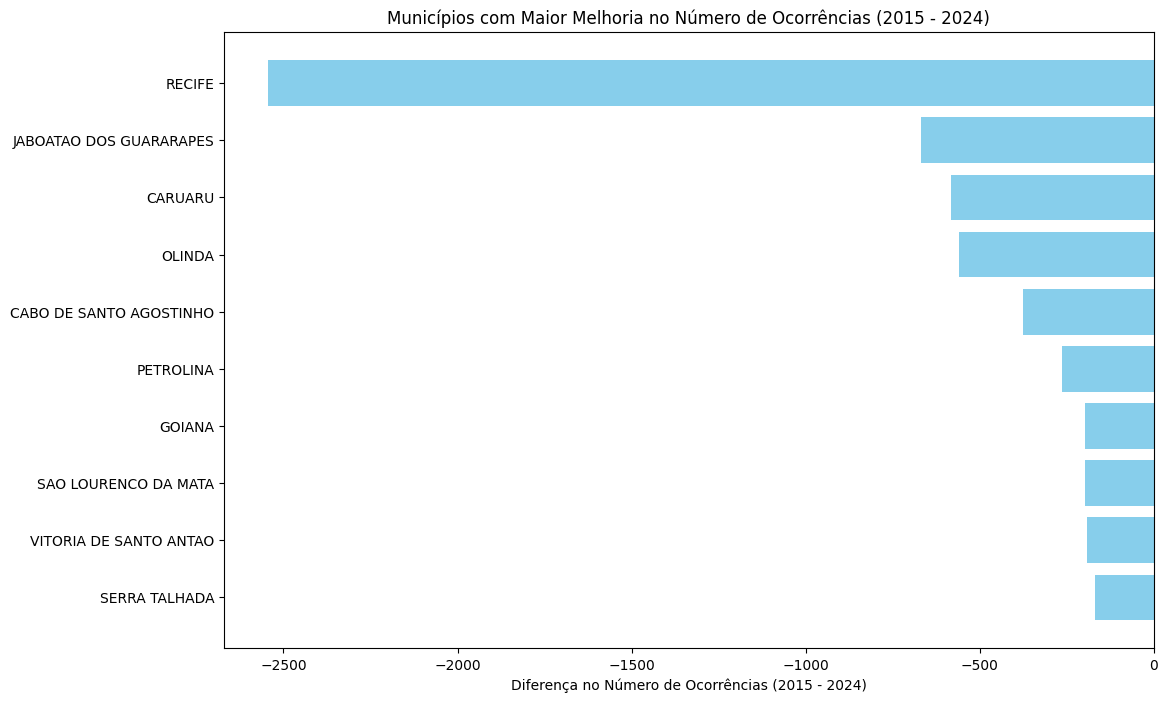

In [62]:
import matplotlib.pyplot as plt

# Configurações para exibir o gráfico no Jupyter Notebook
%matplotlib inline

# Preparar os dados para o gráfico
municipios = df_pandas['MUNICÍPIO']
diferencas = df_pandas['diferença']

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(municipios, diferencas, color='skyblue')
plt.xlabel('Diferença no Número de Ocorrências (2015 - 2024)')
plt.title('Municípios com Maior Melhoria no Número de Ocorrências (2015 - 2024)')
plt.gca().invert_yaxis()  # Inverter os municípios para que o maior esteja no topo
plt.show()


In [71]:
from pyspark.sql import SparkSession

# Inicializa uma sessão Spark
spark = SparkSession.builder.appName("violenciad").getOrCreate()

# Carrega os dados do arquivo CSV
df = spark.read.csv('violencia.csv', header=True, inferSchema=True)

# Exibe as primeiras linhas para entender a estrutura dos dados
df.show(5)


+---+--------------------+--------------------+--------------------+----------+----+--------+--------+----------+
|_c0|           MUNICÍPIO|              REGIAO|            NATUREZA|      DATA| ANO|    SEXO|  IDADE |ENVOLVIDOS|
+---+--------------------+--------------------+--------------------+----------+----+--------+--------+----------+
|  0|             AFRANIO|              SERTÃO|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
|  1|           ALAGOINHA|             AGRESTE|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|6) 35-64|         1|
|  2|            BEZERROS|             AGRESTE|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
|  3|CABO DE SANTO AGO...|REGIÃO METROPOLITANA|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|3) 18-24|         1|
|  4|CABO DE SANTO AGO...|REGIÃO METROPOLITANA|AMEAÇA POR VIOLÊN...|2015-01-01|2015|FEMININO|5) 30-34|         1|
+---+--------------------+--------------------+--------------------+----------+----+----

In [68]:
from pyspark.sql.functions import col

# Filtrar os dados para incluir apenas ocorrências de Recife nos anos de 2015 a 2024
df_recife = df.filter((col('MUNICÍPIO') == 'Recife') & (col('ANO').between(2015, 2024)))


In [69]:
# Contagem de ocorrências por ano para Recife
contagem_por_ano = df_recife.groupBy('ANO').count().orderBy('ANO')

# Coletar os dados para o Pandas para manipulação mais fácil
df_pandas = contagem_por_ano.toPandas()


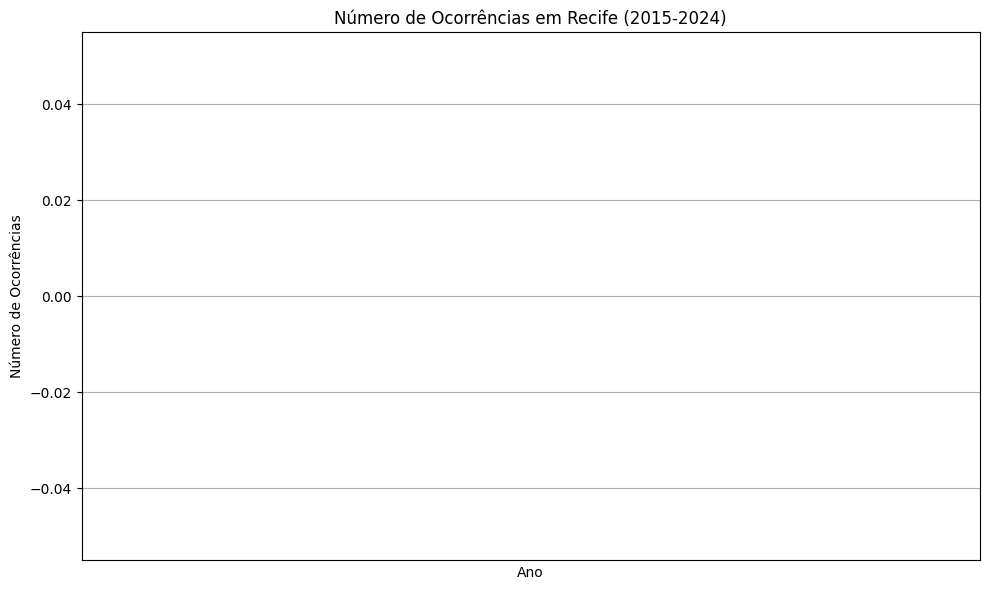

In [72]:
import matplotlib.pyplot as plt

# Configurações para exibir o gráfico no Jupyter Notebook
%matplotlib inline

# Preparar os dados para o gráfico
anos = df_pandas['ANO']
ocorrencias = df_pandas['count']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(anos, ocorrencias, marker='o', linestyle='-')
plt.title('Número de Ocorrências em Recife (2015-2024)')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.grid(True)
plt.xticks(anos)
plt.tight_layout()
plt.show()
